<a href="https://colab.research.google.com/github/AlexsonT/Growdev/blob/main/Trabalho_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parte 01**

#### **Aplicar filtro Gausiano**

Imports

In [24]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

Abrir imagem

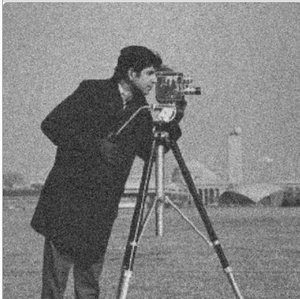

In [23]:
img = cv2.imread('imagem-com-ruido.png', 0)

cv2_imshow(img)

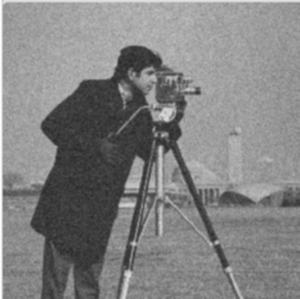

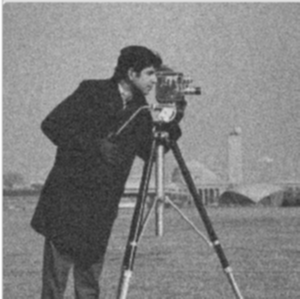

In [45]:
kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16
filter2D = cv2.filter2D(img,-1, kernel)

gausiano = cv2.GaussianBlur(img, (3, 3), 0)

cv2_imshow(filter2D)
cv2_imshow(gausiano)

# **Parte 2**
#### **Você deve utilizar o dataset disponibilizado e responder aos seguintes questionamentos.**
1. Qual o time que mais empatou em 2002 sendo visitante?
2. Qual time que mais venceu jogando quarta-feira?
3. Qual a quantidade de gols marcados por time em 2007 como mandante?
4. Qual a rodada que mais teve gols em 2015?
5. Qual foi a arena que mais sediou jogos de 2010 até 2016?

Imports

In [1]:
import pandas as pd

###### Abrir e preparar o arquivo

In [3]:
dados = pd.read_csv('campeonato-brasileiro-full.csv')

dados['Data'] = pd.DatetimeIndex(dados['Data']).year
dados.columns = dados.columns.str.replace(' ', '_')

dados.head(11)

,Rodada,Data,Horário,Dia,Mandante,Visitante,Vencedor,Arena,Mandante_Placar,Visitante_Placar,Estado_Mandante,Estado_Visitante,Estado_Vencedor
0,1,2000,16h00,Sábado,Fluminense,Bahia,Fluminense,Maracanã,2,0,RJ,BA,RJ
1,1,2000,16h00,Sábado,Vasco,Sport,Sport,São Januário,0,2,RJ,PE,PE
2,1,2000,16h00,Sábado,Vitória,Palmeiras,Vitória,Barradão,4,1,ES,SP,ES
3,1,2000,17h00,Domingo,Botafogo-RJ,Atlético-MG,-,Caio Martins,0,0,RJ,MG,-
4,1,2000,18h30,Domingo,Juventude,Flamengo,-,Alfredo Jaconi,1,1,RS,RJ,-
5,1,2000,16h00,Domingo,Guarani,Santa Cruz,-,Brinco de Ouro,0,0,SP,PE,-
6,1,2000,17h00,Domingo,Cruzeiro,Athlético-PR,Athlético-PR,Mineirão,0,2,MG,PR,PR
7,1,2000,16h00,Domingo,América-MG,Gama,Gama,Independência,0,1,MG,DF,DF
8,1,2000,18h30,Domingo,Goiás,Corinthians,Goiás,Serra Dourada,3,0,GO,SP,GO
9,2,2000,20h30,Quarta-feira,Coritiba,Sport,-,Couto Pereira,0,0,PR,PE,-


###### 01) Qual o time que mais empatou em 2002 sendo visitante?

In [ ]:
new_data = dados[['Data', 'Visitante', 'Estado_Vencedor']]
info = new_data.query('Data == 2002 & Estado_Vencedor == "-"')
empates = info.groupby('Visitante').count()
mais_empatou = empates['Estado_Vencedor'].max()
resposta = empates.query(f'Estado_Vencedor == {mais_empatou}')

print(f'O time que mais empatou em 2002 sendo visitante foi o: {resposta.iloc[0].name}.')

O time que mais empatou em 2002 sendo visitante foi o: Internacional.


###### 02) Qual time que mais venceu jogando quarta-feira?

In [ ]:
new_data = dados.query('Dia == "Quarta-feira" & Vencedor != "-"')
new_data = new_data[['Dia', 'Vencedor']]
vitorias = new_data.groupby('Vencedor').count()
mais_venceu = vitorias['Dia'].max()

resposta = vitorias.query(f'Dia == {mais_venceu}')

print(f'O time que mais venceu jogando na quarta-feira foi o: {resposta.iloc[0].name}.')


O time que mais venceu jogando na quarta-feira foi o: Corinthians.


###### 03) Qual a quantidade de gols marcados por time em 2007 como mandante?

In [ ]:
new_data = dados.query('Data == 2007')
new_data = new_data[['Mandante', 'Mandante_Placar']]
group = new_data.groupby('Mandante').sum()

display(group)

,Mandante_Placar
Mandante,
América-RN,12
Athlético-PR,29
Atlético-MG,40
Botafogo-RJ,38
Corinthians,17
Cruzeiro,44
Figueirense,35
Flamengo,37
Fluminense,30


###### 04) Qual a rodada que mais teve gols em 2015?

In [ ]:
new_data = dados.query('Data == 2015')
new_data =new_data[['Rodada', 'Mandante_Placar', 'Visitante_Placar']]
new_data['Total_Gols'] = new_data['Mandante_Placar'] + new_data['Visitante_Placar']
group = new_data.groupby('Rodada').sum()
max_gols = group['Total_Gols'].max()

resposta = group.query(f'Total_Gols == {max_gols}')

print(f'A rodada de 2015 que teve mais gols foi a: {resposta.iloc[0].name}')

A rodada de 2015 que teve mais gols foi a: 31


###### 05) Qual foi a arena que mais sediou jogos de 2010 até 2016?

In [ ]:
periodo = dados.query('2010 <= Data <=2016')
arena = periodo[['Arena', 'Estado_Vencedor']]
arena = arena.groupby('Arena').count()
mais_sediou = arena['Estado_Vencedor'].max()
resposta = arena.query(f'Estado_Vencedor == {mais_sediou}')

print(f'A arena que mais sediou jogos de 2010 até 2016 foi: {resposta.iloc[0].name}.')

A arena que mais sediou jogos de 2010 até 2016 foi: Maracanã.
